This notebook shows timeseries of the LET ensemble spread of reconstruction bias and RMSE for the different sampling experiments (reconstructions are compared to the "model truth" of the Large Ensemble Testbed). 

This notebook was created by Thea Hatlen Heimdal, in collaboration with Julius Busecke and Abby Shaum.

In [ ]:
import numpy as np
import pandas as pd
import xarray as xr
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Loading references - pickle files of the picked LET members


path_LET = "/local/data/artemis/workspace/theimdal/saildrone/LET_pickle_files/members_LET_dict_GFDL.pickle" 

with open(path_LET,'rb') as handle:
    mems_dict = pickle.load(handle)

#### SOCAT-Baseline

In [45]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/SOCAT/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_full_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_SOCAT_only = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 5 years

In [46]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 5 years winter

In [47]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_5/models/saildrone5_5x_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_5_5x_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years

In [48]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years year-round

In [49]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_shifted/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_shifted = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 10 years

In [50]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 10 years winter

In [51]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/10_years_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_10_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years 13 saildrones

In [52]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### One-lat 10 years 13 saildrone winter

In [53]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_10_new/models/saildrone10_mult_12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_10_mult_12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 5 years

In [54]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12 = xr.concat(datasets_ens, dim='ensemble', join='override') 

#### Zigzag 5 years winter

In [55]:
datasets_ens = []
for ens, mem_list in mems_dict.items():
    datasets_member = []
    for n_member, member in enumerate(mem_list):
        if ens == "CanESM2":
            date_str = '201712'
        else:
            date_str = '201701'
        truth_path = f"/data/artemis/simulations/LET/{ens}/member_{member}/pCO2_2D_mon_{ens}{member}_1x1_198201-{date_str}.nc"
        recon_path = f"/data/artemis/workspace/theimdal/saildrone_zigzag/models/5_years_x12_winter/reconstructions/xg/{ens}/member_{member}/recon_pCO2DIC_pCO2_2D_mon_{ens}_{member}_1x1_198201-201701.nc"
        kwargs = dict(chunks={'time':-1})
        
        truth = xr.open_dataset(truth_path, **kwargs).pCO2
        recon = xr.open_dataset(recon_path, **kwargs).pCO2_recon
        
        # assign_dimension coordinates
        truth = truth.assign_coords(status='truth')
        recon = recon.assign_coords(status='reconstructed')
        
        # make sure they have the same time coordinates
        truth = truth.assign_coords(time=recon['time'].data)
        
        member_ds = xr.concat([truth, recon], dim='status')
        
        # add member_dimension and coordinate
        member_ds = member_ds.assign_coords(n_member=n_member, member=member)
        
        datasets_member.append(member_ds)
    
    ds_ens = xr.concat(datasets_member, dim='n_member')
    ds_ens = ds_ens.assign_coords(ensemble=ens)
    
    
    datasets_ens.append(ds_ens)
    
ds_Saildrone_zigzag_5_x12_winter = xr.concat(datasets_ens, dim='ensemble', join='override') 

### Bias

In [14]:
#Calculate bias for individual members of the LET

timeline_SOCAT_SO = ds_SOCAT_only.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['time','xlon', 'ylat', 'status', 'ensemble'])
timeline_5_SO = ds_Saildrone_5.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_5_winter_SO = ds_Saildrone_5_5x_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_10_SO = ds_Saildrone_10.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_10_shifted_SO = ds_Saildrone_10_shifted.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_x12_SO = ds_Saildrone_10_mult_12.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_x12_winter_SO = ds_Saildrone_10_mult_12_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_10_SO = ds_Saildrone_zigzag_10.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_10_winter_SO = ds_Saildrone_zigzag_10_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_5_SO = ds_Saildrone_zigzag_5_x12.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat', 'xlon', 'status'])
timeline_zigzag_5_winter_SO = ds_Saildrone_zigzag_5_x12_winter.diff('status').sel(ylat=slice(-90,-35),time=slice("2006-01-01","2016-12-31")).groupby("time.year").mean(['ensemble', 'time', 'ylat','xlon', 'status'])

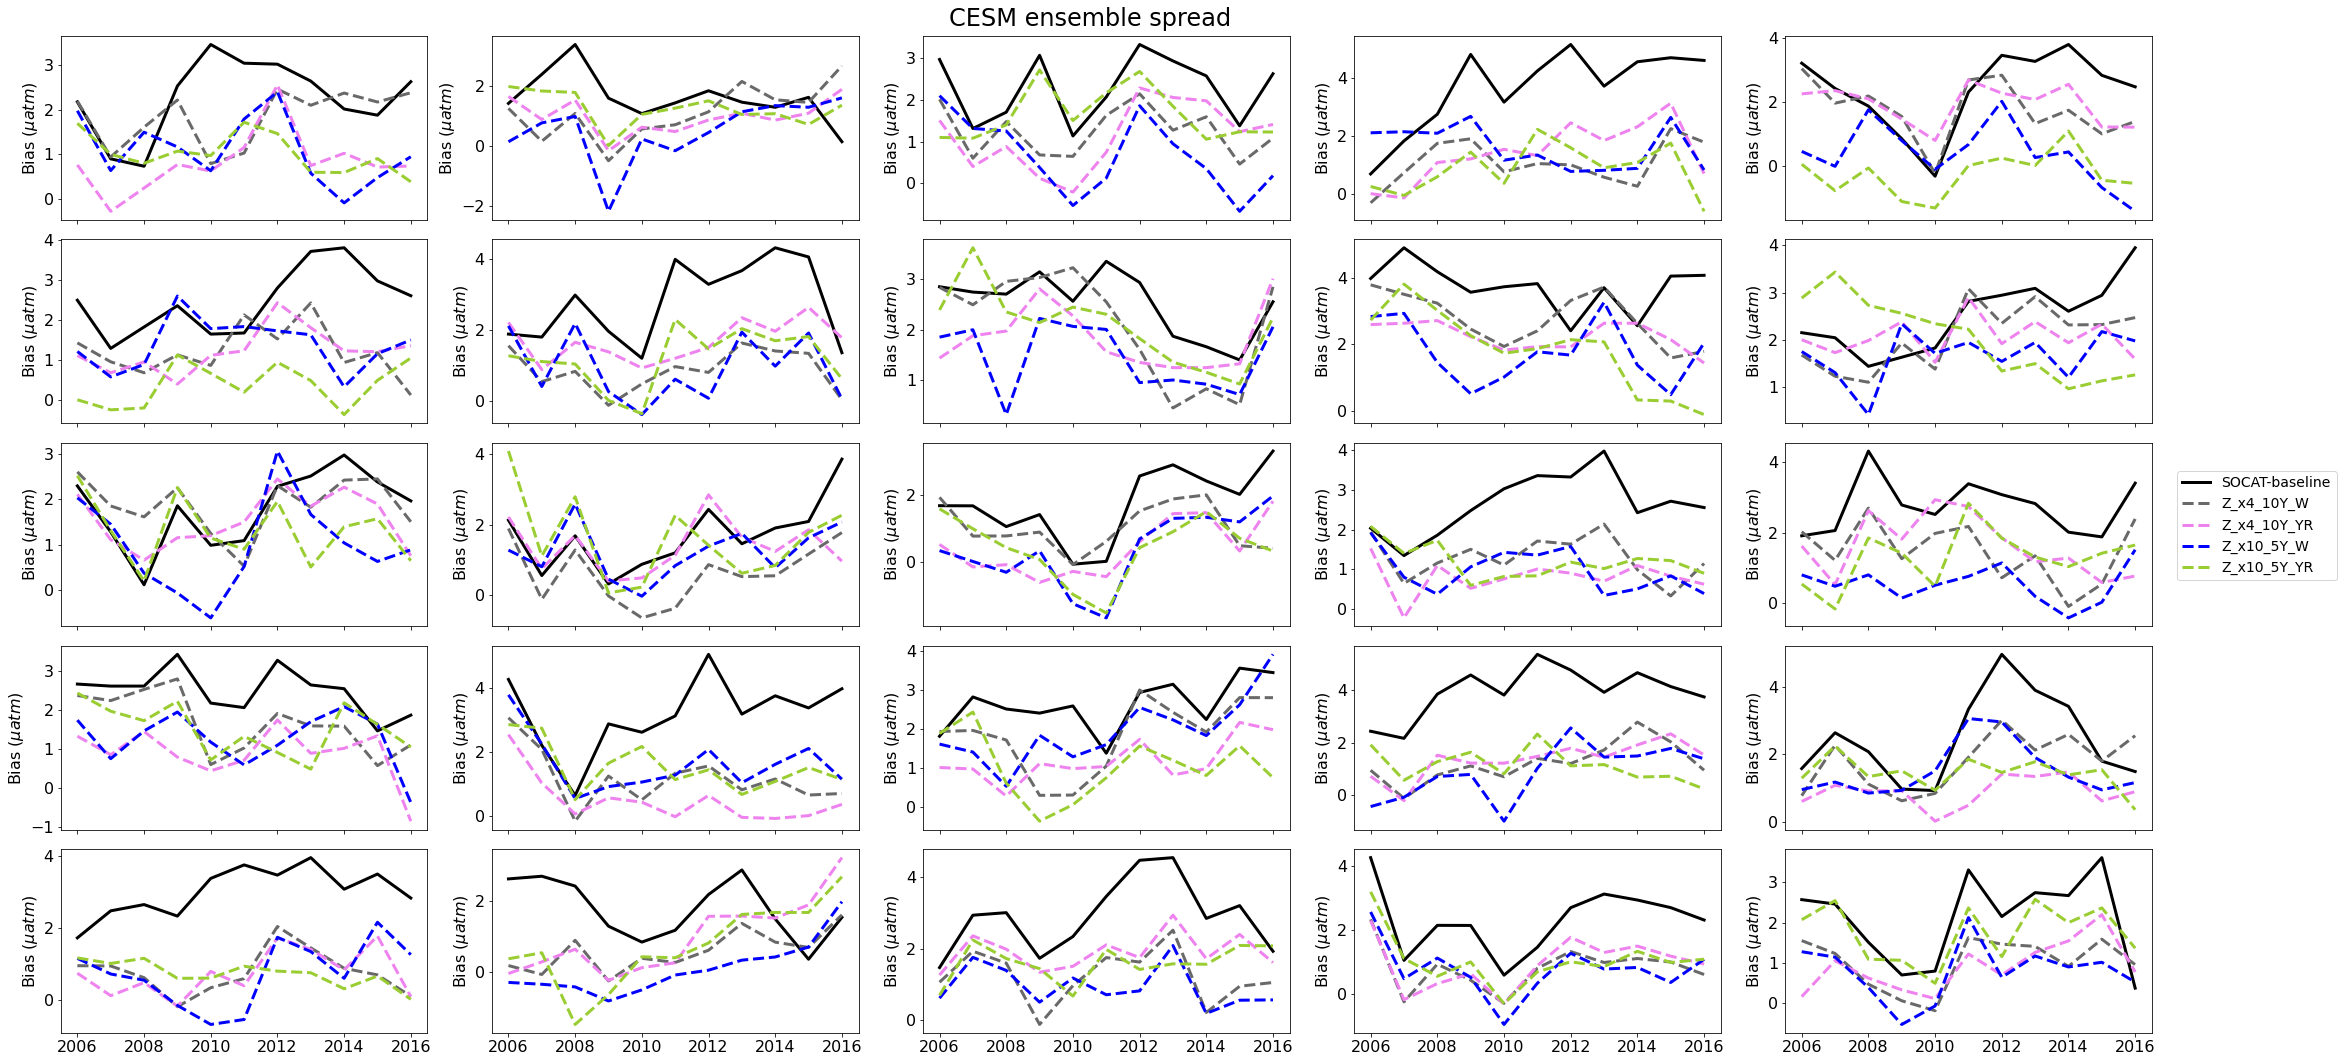

In [21]:
#Plots comparing bias for the SOCAT-baseline versus the zigzag runs over year 2006 to 2016 for CESM

fig, ax = plt.subplots(5,5, figsize=(30, 15),sharex=True)
fig.suptitle('CESM ensemble spread', fontsize=24)

for no,a in enumerate(ax.flat):
    a.plot(range(2006,2017),timeline_SOCAT_SO[no,:], label='SOCAT-baseline', color ='black', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_10_winter_SO[no,:], label='Z_x4_10Y_W', color ='dimgray', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_10_SO[no,:], label='Z_x4_10Y_YR', color ='violet', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_5_winter_SO[no,:], label='Z_x10_5Y_W', color ='blue', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_5_SO[no,:], label='Z_x10_5Y_YR', color ='yellowgreen', linestyle='--', linewidth=3.0)
    a.set_ylabel('Bias ($\mu atm$)', fontsize=16)
    a.tick_params(axis='both', which='major', labelsize=16)
    
handles, labels = ax[-1,-1].get_legend_handles_labels()

fig.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc='center left', fontsize="14")

fig.tight_layout()

#fig.savefig("/home/theimdal/bias_timeserie_2006-2016_CESM.jpg",dpi=300, bbox_inches="tight")

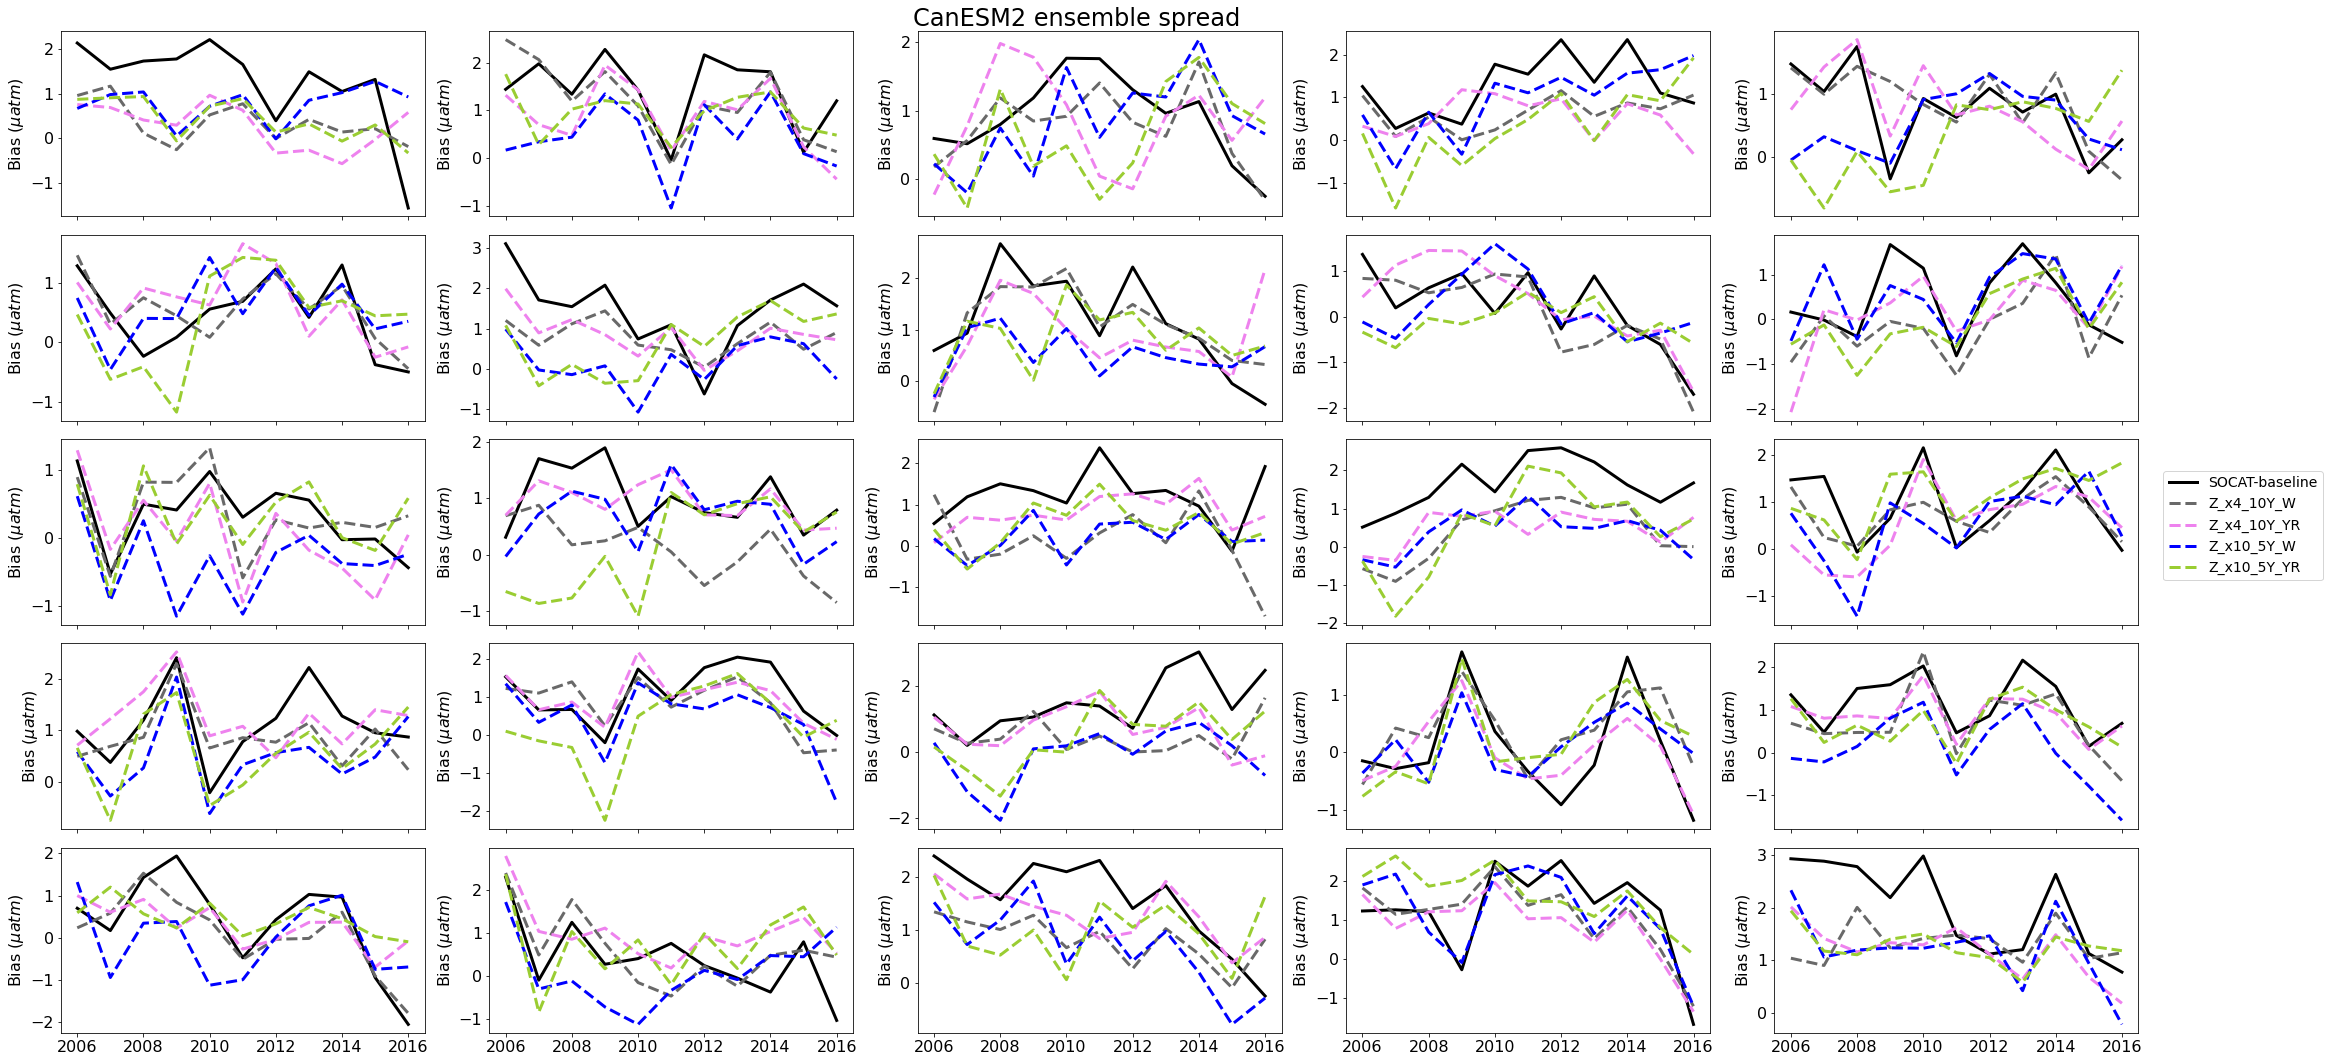

In [15]:
#Plots comparing bias for the SOCAT-baseline versus the zigzag runs over year 2006 to 2016 for CanESM2

fig, ax = plt.subplots(5,5, figsize=(30, 15),sharex=True)
fig.suptitle('CanESM2 ensemble spread', fontsize=24)

for no,a in enumerate(ax.flat):
    a.plot(range(2006,2017),timeline_SOCAT_SO[no,:], label='SOCAT-baseline', color ='black', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_10_winter_SO[no,:], label='Z_x4_10Y_W', color ='dimgray', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_10_SO[no,:], label='Z_x4_10Y_YR', color ='violet', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_5_winter_SO[no,:], label='Z_x10_5Y_W', color ='blue', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_5_SO[no,:], label='Z_x10_5Y_YR', color ='yellowgreen', linestyle='--', linewidth=3.0)
    a.set_ylabel('Bias ($\mu atm$)', fontsize=16)
    a.tick_params(axis='both', which='major', labelsize=16)
    
handles, labels = ax[-1,-1].get_legend_handles_labels()

fig.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc='center left', fontsize="14")

fig.tight_layout()

#fig.savefig("/home/theimdal/bias_timeserie_2006-2016_CanESM2.jpg",dpi=300, bbox_inches="tight")

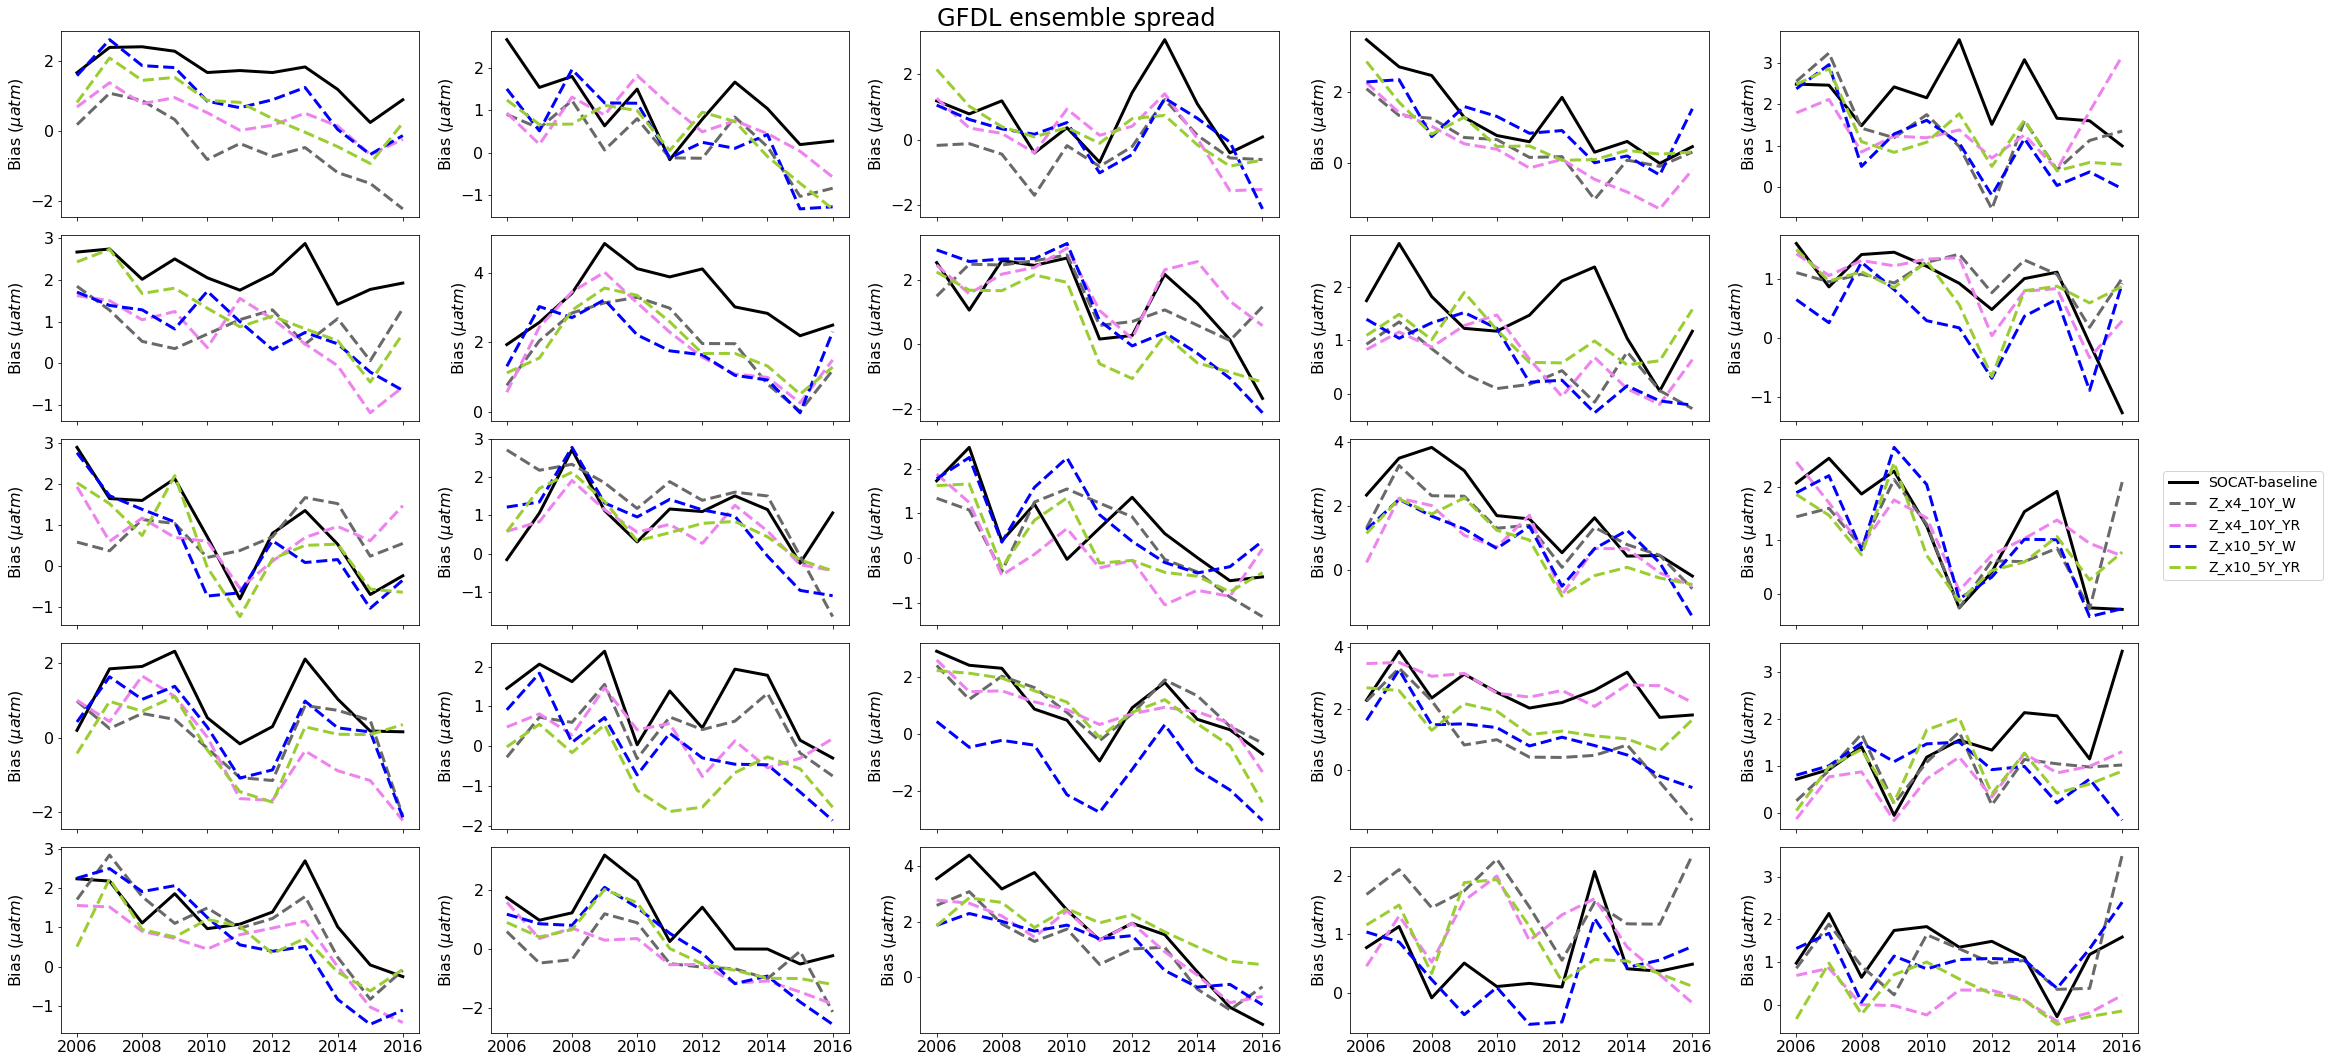

In [15]:
#Plots comparing bias for the SOCAT-baseline versus the zigzag runs over year 2006 to 2016 for GFDL

fig, ax = plt.subplots(5,5, figsize=(30, 15),sharex=True)
fig.suptitle('GFDL ensemble spread', fontsize=24)

for no,a in enumerate(ax.flat):
    a.plot(range(2006,2017),timeline_SOCAT_SO[no,:], label='SOCAT-baseline', color ='black', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_10_winter_SO[no,:], label='Z_x4_10Y_W', color ='dimgray', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_10_SO[no,:], label='Z_x4_10Y_YR', color ='violet', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_5_winter_SO[no,:], label='Z_x10_5Y_W', color ='blue', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),timeline_zigzag_5_SO[no,:], label='Z_x10_5Y_YR', color ='yellowgreen', linestyle='--', linewidth=3.0)
    a.set_ylabel('Bias ($\mu atm$)', fontsize=16)
    a.tick_params(axis='both', which='major', labelsize=16)
    
handles, labels = ax[-1,-1].get_legend_handles_labels()

fig.legend(handles, labels, bbox_to_anchor=(1, 0.5), loc='center left', fontsize="14")

fig.tight_layout()

#fig.savefig("/home/theimdal/bias_timeserie_2006-2016_GFDL.jpg",dpi=300, bbox_inches="tight")

### RMSE

In [31]:
#Calcuate RMSE for all experiments

RMSE_timeline_SOCAT_SO = xr.ufuncs.sqrt(((ds_SOCAT_only.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_5_SO = xr.ufuncs.sqrt(((ds_Saildrone_5.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_5_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_5_5x_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_10_SO = xr.ufuncs.sqrt(((ds_Saildrone_10.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_10_shifted_SO = xr.ufuncs.sqrt(((ds_Saildrone_10_shifted.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_x12_SO = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_x12_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_10_mult_12_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_10_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_10_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_10_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_5_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble','status', 'time', 'xlon', 'ylat']))
RMSE_timeline_zigzag_5_winter_SO = xr.ufuncs.sqrt(((ds_Saildrone_zigzag_5_x12_winter.diff('status'))**2).sel(ylat=slice(-90,-35),time=slice('2006', '2016')).groupby("time.year").mean(['ensemble', 'status', 'time', 'xlon', 'ylat']))

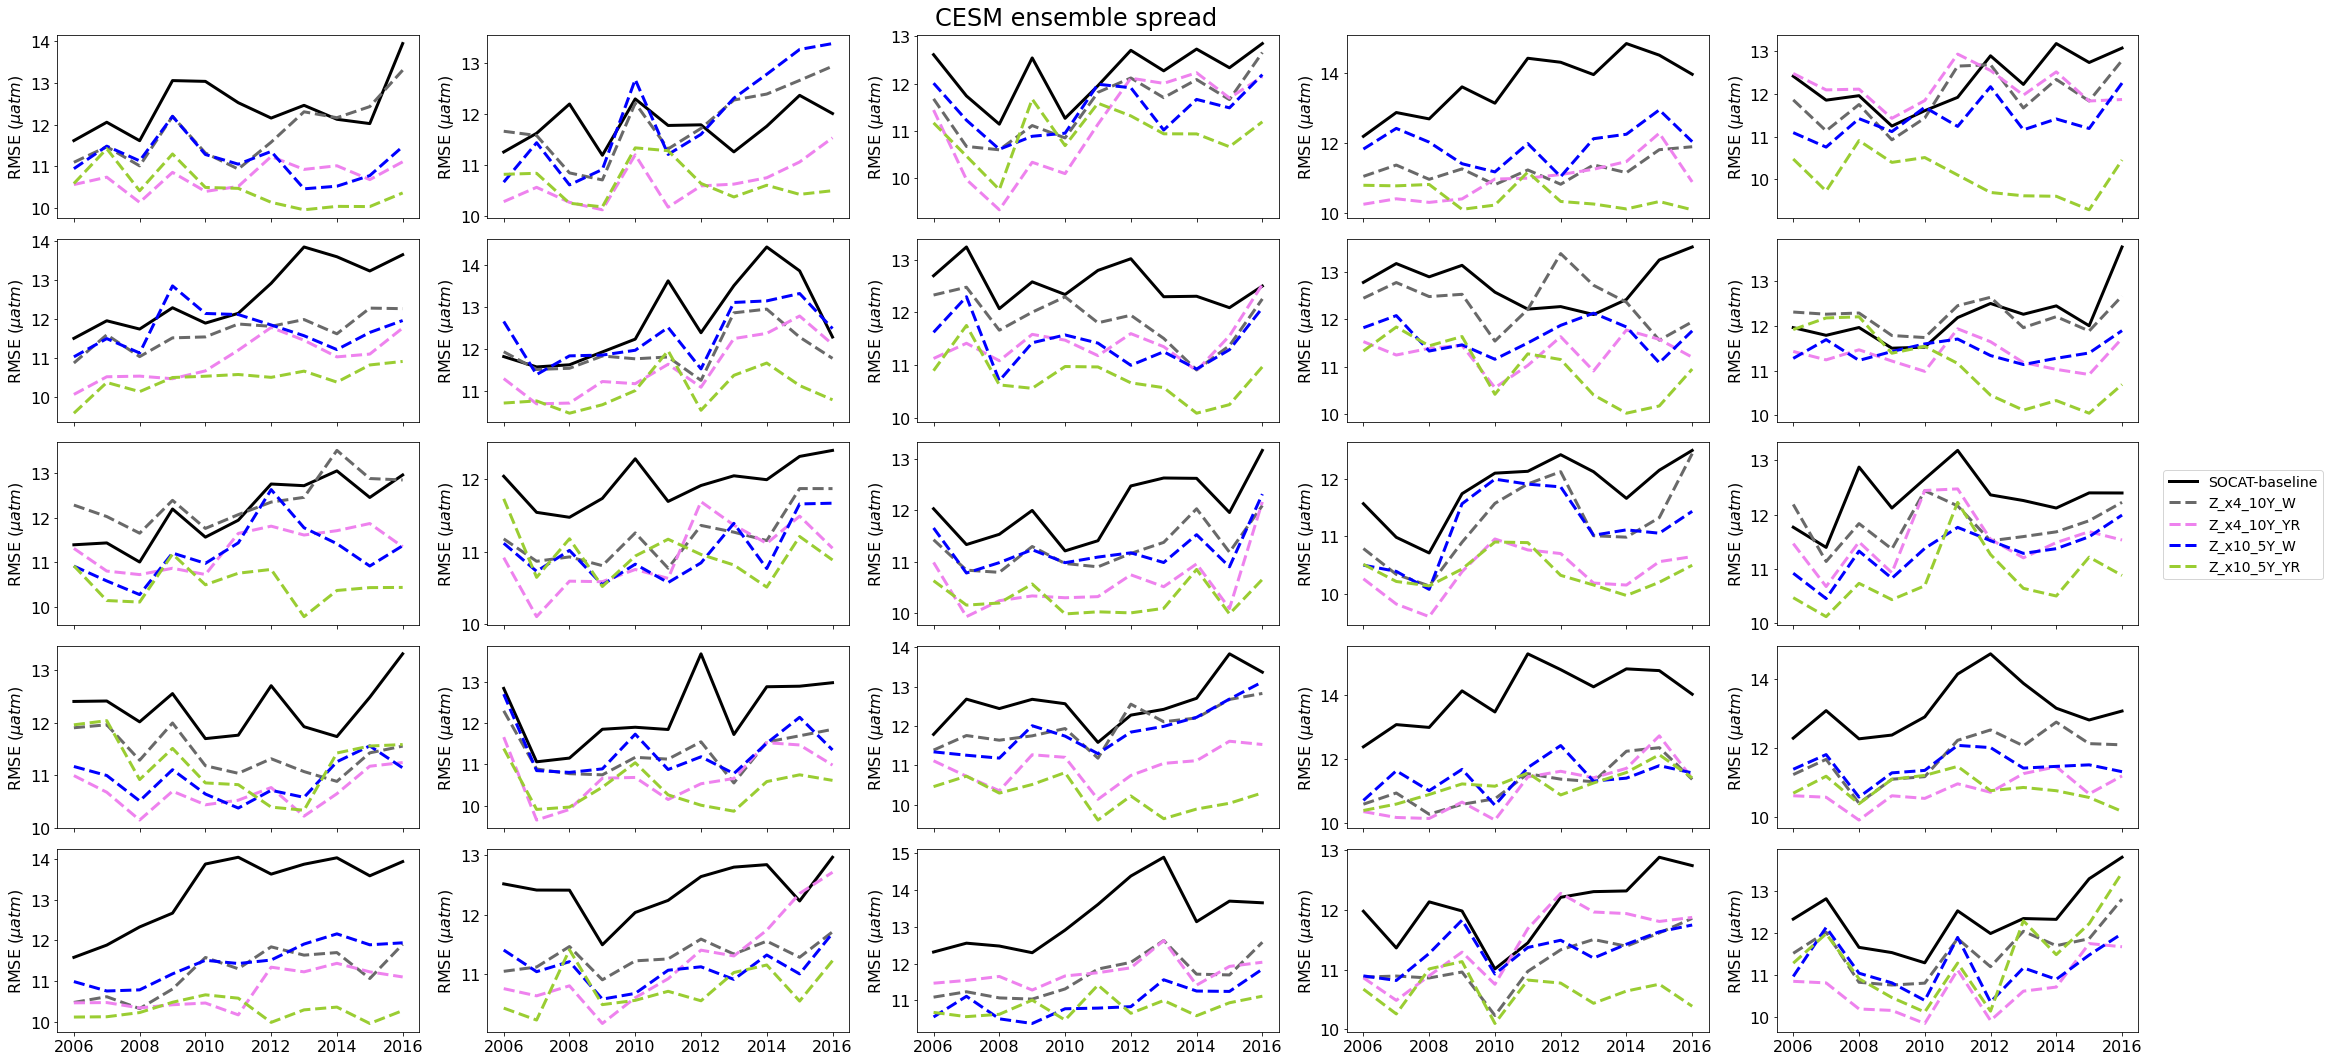

In [32]:
#Plots comparing RMSE for the SOCAT-baseline versus the zigzag runs over year 2006 to 2016 for CESM

fig, ax = plt.subplots(5,5, figsize=(30, 15),sharex=True)
fig.suptitle('CESM ensemble spread', fontsize=24)

for no,a in enumerate(ax.flat):
    a.plot(range(2006,2017),RMSE_timeline_SOCAT_SO[no,:], label='SOCAT-baseline', color ='black', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_10_winter_SO[no,:], label='Z_x4_10Y_W', color ='dimgray', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_10_SO[no,:], label='Z_x4_10Y_YR', color ='violet', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_5_winter_SO[no,:], label='Z_x10_5Y_W', color ='blue', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_5_SO[no,:], label='Z_x10_5Y_YR', color ='yellowgreen', linestyle='--', linewidth=3.0)
    a.set_ylabel('RMSE ($\mu atm$)', fontsize=16)
    a.tick_params(axis='both', which='major', labelsize=16)

    

handles, labels = ax[-1,-1].get_legend_handles_labels()

#fig.legend(handles, labels,bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.legend(handles, labels,loc='center left', fontsize="14", bbox_to_anchor=(1, 0.5))

fig.tight_layout()


#fig.savefig("/home/theimdal/RMSE_timeserie_2006-2016_CESM.jpg",dpi=300, bbox_inches="tight")

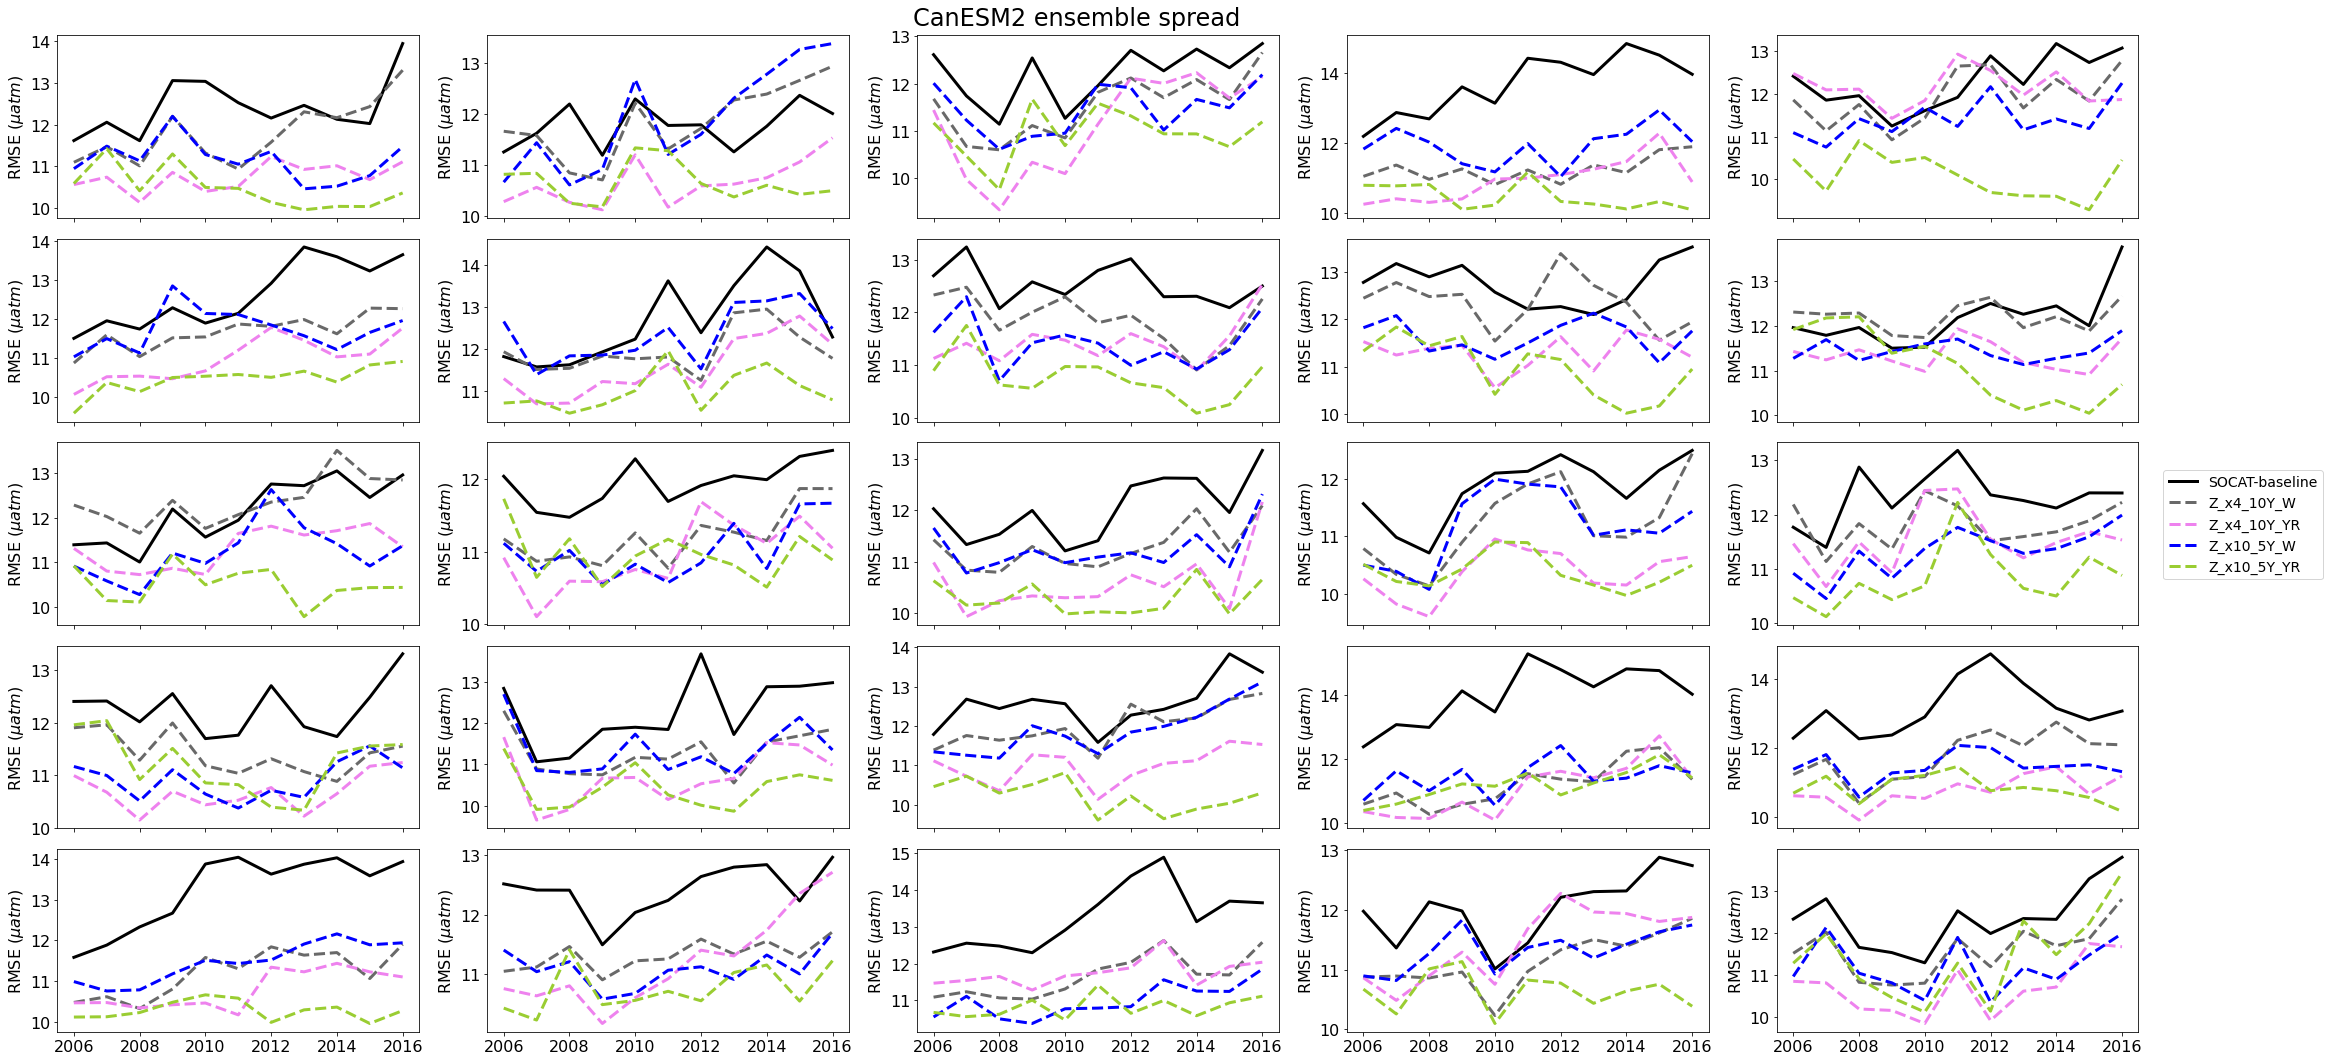

In [43]:
#Plots comparing RMSE for the SOCAT-baseline versus the zigzag runs over year 2006 to 2016 for CanESM2

fig, ax = plt.subplots(5,5, figsize=(30, 15),sharex=True)
fig.suptitle('CanESM2 ensemble spread', fontsize=24)

for no,a in enumerate(ax.flat):
    a.plot(range(2006,2017),RMSE_timeline_SOCAT_SO[no,:], label='SOCAT-baseline', color ='black', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_10_winter_SO[no,:], label='Z_x4_10Y_W', color ='dimgray', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_10_SO[no,:], label='Z_x4_10Y_YR', color ='violet', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_5_winter_SO[no,:], label='Z_x10_5Y_W', color ='blue', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_5_SO[no,:], label='Z_x10_5Y_YR', color ='yellowgreen', linestyle='--', linewidth=3.0)
    a.set_ylabel('RMSE ($\mu atm$)', fontsize=16)
    a.tick_params(axis='both', which='major', labelsize=16)

    

handles, labels = ax[-1,-1].get_legend_handles_labels()

#fig.legend(handles, labels,bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.legend(handles, labels,loc='center left', fontsize="14", bbox_to_anchor=(1, 0.5))

fig.tight_layout()


#fig.savefig("/home/theimdal/RMSE_timeserie_2006-2016_CanESM2.jpg",dpi=300, bbox_inches="tight")

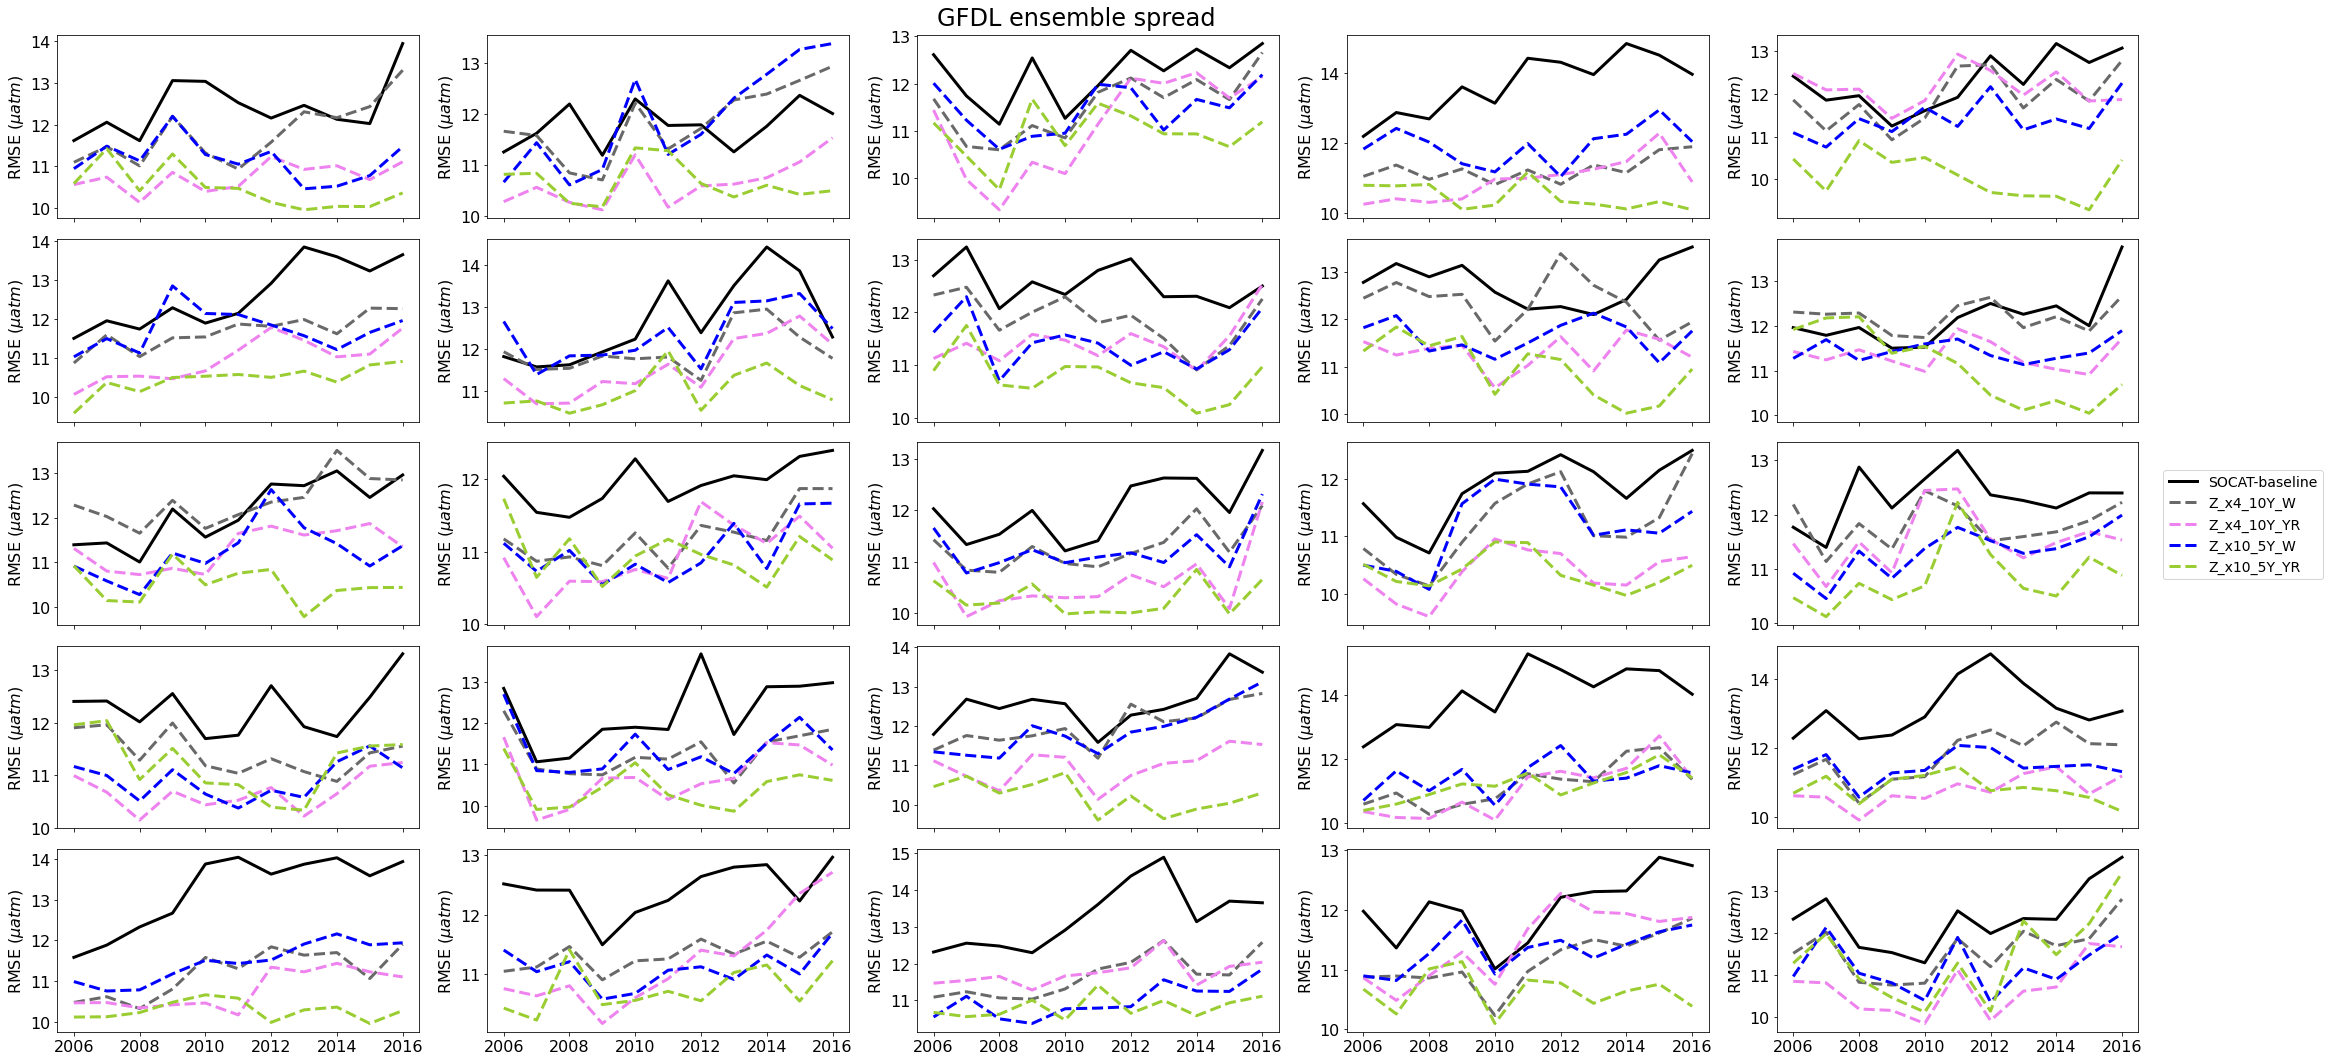

In [58]:
#Plots comparing RMSE for the SOCAT-baseline versus the zigzag runs over year 2006 to 2016 for GFDL

fig, ax = plt.subplots(5,5, figsize=(30, 15),sharex=True)
fig.suptitle('GFDL ensemble spread', fontsize=24)

for no,a in enumerate(ax.flat):
    a.plot(range(2006,2017),RMSE_timeline_SOCAT_SO[no,:], label='SOCAT-baseline', color ='black', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_10_winter_SO[no,:], label='Z_x4_10Y_W', color ='dimgray', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_10_SO[no,:], label='Z_x4_10Y_YR', color ='violet', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_5_winter_SO[no,:], label='Z_x10_5Y_W', color ='blue', linestyle='--', linewidth=3.0)
    a.plot(range(2006,2017),RMSE_timeline_zigzag_5_SO[no,:], label='Z_x10_5Y_YR', color ='yellowgreen', linestyle='--', linewidth=3.0)
    a.set_ylabel('RMSE ($\mu atm$)', fontsize=16)
    a.tick_params(axis='both', which='major', labelsize=16)

    

handles, labels = ax[-1,-1].get_legend_handles_labels()

#fig.legend(handles, labels,bbox_to_anchor=(1.0, 1.0), loc='upper left')
fig.legend(handles, labels,loc='center left', fontsize="14", bbox_to_anchor=(1, 0.5))

fig.tight_layout()


#fig.savefig("/home/theimdal/RMSE_timeserie_2006-2016_GFDL.jpg",dpi=300, bbox_inches="tight")